This file uses KS-Test to compare the distribution of two given datasets.

In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits import mplot3d
import math
from scipy.stats import ks_2samp

# %matplotlib widget
basePath = "./sims.TNG/TNG100-1/output"


In [2]:
initial_snapshot = 69
end_snapshot = 99

halos_fields = ["GroupFirstSub", "GroupNsubs", "GroupMass", "GroupPos"]
subhalos_fields = ["SubhaloGrNr", "SubhaloMass", "SubhaloPos"]
tree_fields = ["SubfindID", "SnapNum"]

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3


In [3]:
def Detect_Mkdir(Path):
    if not (os.path.exists(Path)):
        os.makedirs(Path)
    return Path


In [4]:
FilePath = Detect_Mkdir(os.path.join('./TNG100_Final_File'))
Final_File_List = ['Halo_Array', 'Host_Array', 'MMS_Array', 'First_App_Snap_Array', 'First_App_Distance_Array',
                   'Snap99_Distance_Array', 'Snap99_Radial_Velocity_Array', 'Snap99_Virial_Radius_Array', 'Is_First_Approach']
for filename in Final_File_List:
    if os.path.exists(os.path.join(FilePath, filename)+'.npy'):
        globals()[filename] = np.load(
            (os.path.join(FilePath, filename)+'.npy'))


In [5]:
condition = (Is_First_Approach==1)

First_Approach_Sub_Index = np.where(condition)[0]


In [6]:
halos_data = il.groupcat.loadHalos(basePath, end_snapshot, fields=halos_fields)
subhalos_data = il.groupcat.loadSubhalos(basePath, end_snapshot, fields=subhalos_fields)
first_subhalo_indices = halos_data["GroupFirstSub"]
n_subhalos = halos_data["GroupNsubs"]
group_mass = halos_data["GroupMass"]
subhalos_grnr = subhalos_data["SubhaloGrNr"]
subhalos_mass = subhalos_data["SubhaloMass"]


In [7]:
host_mass=subhalos_mass[Host_Array]
first_approach_host_mass=subhalos_mass[Host_Array[First_Approach_Sub_Index]]
mms_mass=subhalos_mass[MMS_Array]
first_approach_mms_mass=subhalos_mass[MMS_Array[First_Approach_Sub_Index]]

ratio=mms_mass/host_mass
first_approach_ratio=first_approach_mms_mass/first_approach_host_mass


Text(0.5, 0, 'Dark Matter Mass (E10M$_\\odot$/h)')

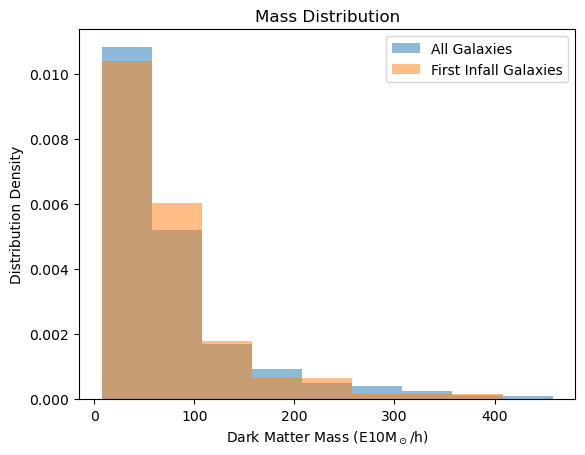

In [8]:
bins = np.linspace(host_mass.min(), host_mass.max(), 10)
plt.hist(host_mass,bins,density=1,alpha=0.5,label='All Galaxies')
plt.hist(first_approach_host_mass,bins,density=1,alpha=0.5,label='First Infall Galaxies')
plt.title('Mass Distribution')
plt.legend(loc='upper right')
plt.ylabel('Distribution Density')
plt.xlabel('Dark Matter Mass (E10M$_\odot$/h)')


In [9]:
ks_2samp(host_mass,first_approach_host_mass)


KstestResult(statistic=0.07614830925379318, pvalue=0.46815984718622233, statistic_location=49.959496, statistic_sign=1)

Text(0.5, 0, 'Dark Matter Mass (E10M$_\\odot$/h Before Log10)')

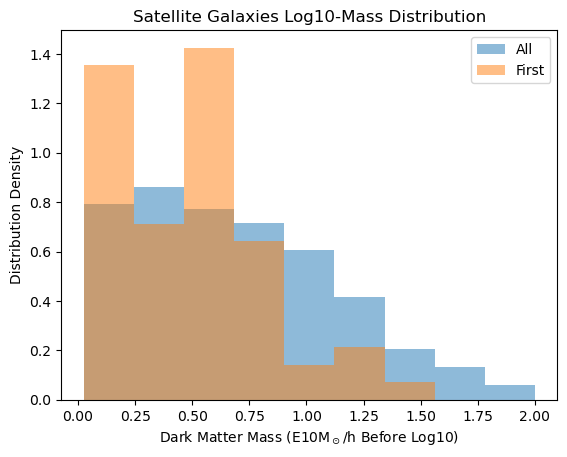

In [12]:
bins = np.linspace(mms_mass.min(), 2, 10)
plt.hist(np.log10(mms_mass),bins,density=1,alpha=0.5,label='All')
plt.hist(np.log10(first_approach_mms_mass),bins,density=1,alpha=0.5,label='First')

plt.legend(loc='upper right')
plt.title('Satellite Galaxies Log10-Mass Distribution')
plt.ylabel('Distribution Density')
plt.xlabel('Dark Matter Mass (E10M$_\odot$/h Before Log10)')


In [11]:
ks_2samp(mms_mass,first_approach_mms_mass)


KstestResult(statistic=0.17149737011473845, pvalue=0.001510231911120361, statistic_location=4.4660873, statistic_sign=-1)

In [14]:
ks_2samp(ratio,first_approach_ratio)


KstestResult(statistic=0.18274373599059013, pvalue=0.0005709654006359609, statistic_location=0.076428816, statistic_sign=-1)

Text(0.5, 1.0, 'Log10-Ratio(MMS/Host) Distribution')

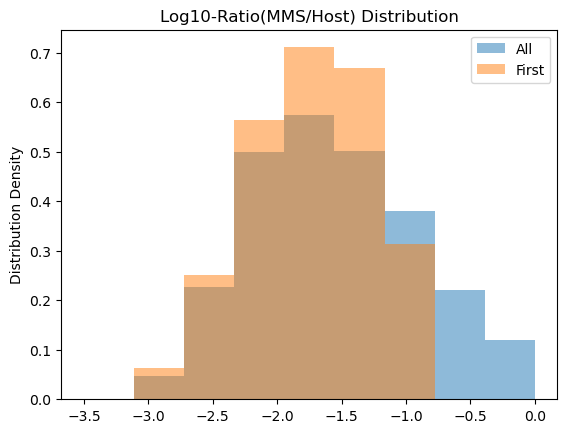

In [13]:
bins = np.linspace(-3.5, 0, 10)
plt.hist(np.log10(ratio),bins,density=1,alpha=0.5,label='All')
plt.hist(np.log10(first_approach_ratio),bins,density=1,alpha=0.5,label='First')

plt.legend(loc='upper right')
plt.ylabel('Distribution Density')
plt.title('Log10-Ratio(MMS/Host) Distribution')


In [ ]:
np.log10(first_approach_ratio.max())


In [ ]:
first_approach_ratio.max()
